**Importing** **libraries**
 **and** **uploading** **dataset** **using** pandas


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from google.colab import files

data = pd.read_csv("/content/corona.csv")
data

<ipython-input-74-1ca12d9eb3e6>:11: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/corona.csv")


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other



**Cheking coulmn and ifo about data**


In [75]:
data.columns


Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


**checking** **for** **missing** **values**


In [77]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

**Cheking** **unique** **values** **in** **ecah** **column**


In [78]:
for column in data:
  unique_value=data[column].unique()
  print(f"unique Value in {column}:",unique_value)

unique Value in Ind_ID: [     1      2      3 ... 278846 278847 278848]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020' '17-04-2020' '18-04-2020' '19-04-2020'
 '20-04-2020' '21-04-2020' '22-04-2020' '23-04-2020' '24-04-2020'
 '25-04-2020' '26-04-2020' '27-04-2020' '28-04-2020' '29-04-2020'
 '30-04-2020']
unique Value in Cough_symptoms: ['TRUE' 'FALSE' 'None' False True]
unique Value in Fever: ['FALSE' 'TRUE' 'None' False True]
unique Value in Sore_throat: ['TRUE' 'FALSE' 'None' False True]
unique Value in Shortness_of_breath: 

In [79]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

*here* *we* *observed* *that* *there* *are* *some* *null* *values* *in* *fever* *and* *coughsymptoms* *features*


In [80]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [81]:
data['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [82]:
data['Shortness_of_breath'].value_counts()

False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64

**droping null values in data**

In [83]:
data.dropna(inplace=True)

In [84]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


Data Analysis Approach:
Data Preprocessing: Clean the dataset and handle missing values, outliers, and duplicates.
Feature Engineering: Create new features if necessary and encode categorical variables.
Exploratory Data Analysis (EDA): Visualize the data to identify patterns and correlations among variables.
Feature Importance: Determine which features have the most influence on COVID-19 diagnosis using appropriate techniques.
Data Split: Split the data into training (March 11th - April 15th), validation (March 11th - April 15th), and test (April 16th - April 30th) .

In [85]:
# Data Preprocessing
# Clean the dataset, handle missing values, duplicates, and outliers
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)


In [86]:
data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [87]:
data['Corona'].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

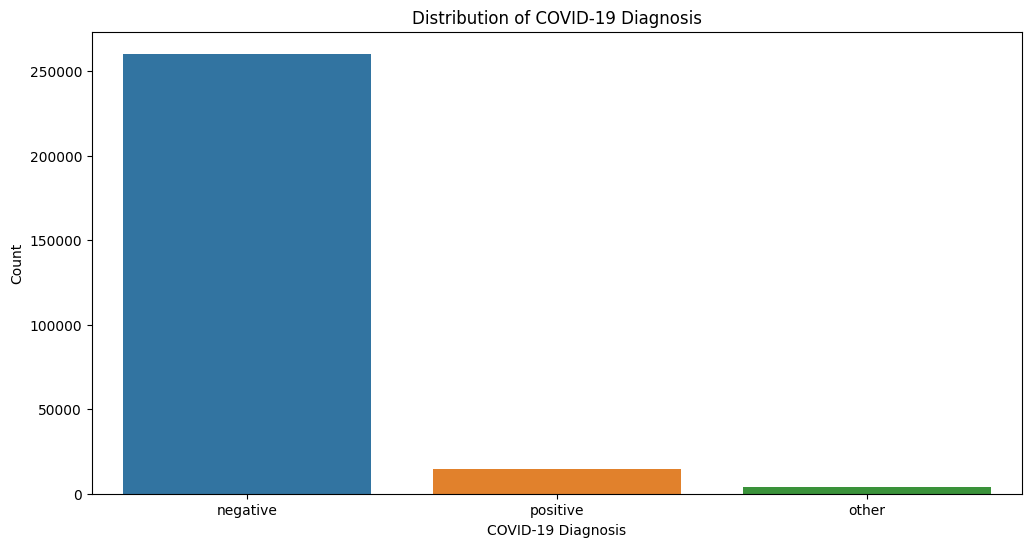

In [88]:
# Exploratory Data Analysis (EDA)
# Visualize the data to identify patterns and correlations
plt.figure(figsize=(12, 6))
sns.countplot(x='Corona', data=data)
plt.title('Distribution of COVID-19 Diagnosis')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

We use sns.countplot to visualize the distribution of COVID-19 diagnoses (Covid report) in Visualization

The plot shows that there is a noticeable imbalance in the dataset, with a larger number of individuals testing negative for COVID-19 (labeled as 0) compared to those testing positive (labeled as 1).



<ipython-input-89-a5b9756edde2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


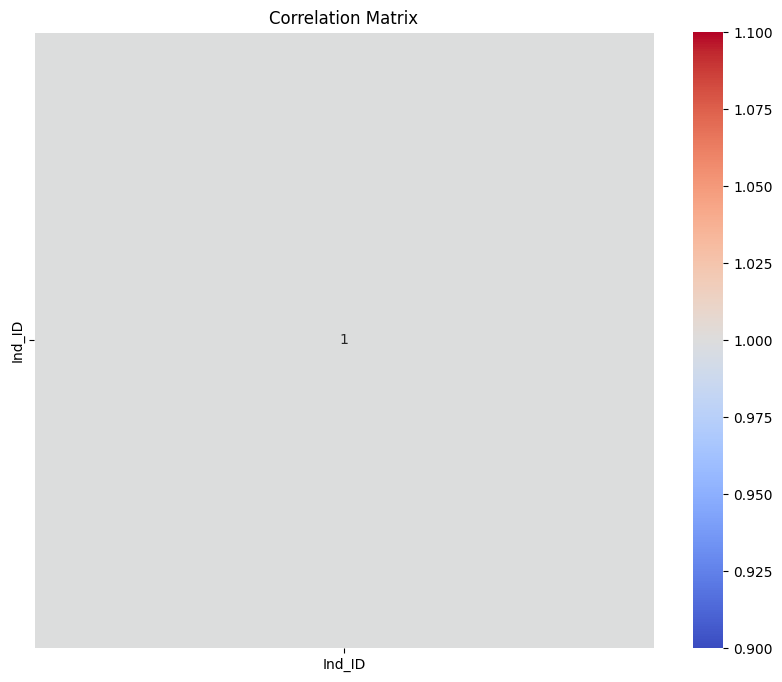

In [89]:
# Feature Importance
# Determine feature importance using a correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Exploratory Data Analysis (EDA) to visualize the distribution of COVID-19 diagnoses and correlations between variables.

In [90]:
# Data Preprocessing and Feature Engineering
data['Test_date'] = pd.to_datetime(data['Test_date'])


<ipython-input-90-71ae3cdcacad>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Test_date'] = pd.to_datetime(data['Test_date'])


In [91]:
binary_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
data[binary_columns] = data[binary_columns].astype(bool)

In [92]:
# Apply One-Hot Encoding to the outcome column
encoded_outcome = pd.get_dummies(data['Corona'], prefix='Outcome')

# Concatenate the encoded outcome columns with the original DataFrame
data_encoded = pd.concat([data, encoded_outcome], axis=1)

# Display the first few rows of the encoded DataFrame
print(data_encoded.head())

   Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0       1 2020-11-03            True   True         True                 True   
1       2 2020-11-03            True   True         True                 True   
2       3 2020-11-03            True   True         True                 True   
3       4 2020-11-03            True   True         True                 True   
4       5 2020-11-03            True   True         True                 True   

   Headache    Corona Age_60_above   Sex           Known_contact  \
0      True  negative         None  None                  Abroad   
1      True  positive         None  None                  Abroad   
2      True  positive         None  None                  Abroad   
3      True  negative         None  None                  Abroad   
4      True  negative         None  None  Contact with confirmed   

   Outcome_negative  Outcome_other  Outcome_positive  
0                 1              0               

In [93]:
# Define a mapping for the categories
age_mapping = {'Yes': 1, 'No': 0, 'None': -1}

In [94]:
# Apply the mapping to the "Age_60_above" column
data['Age_60_above_numeric'] = data['Age_60_above'].map(age_mapping)

In [95]:
# Display the first few rows of the DataFrame with the new column
print(data.head())

   Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0       1 2020-11-03            True   True         True                 True   
1       2 2020-11-03            True   True         True                 True   
2       3 2020-11-03            True   True         True                 True   
3       4 2020-11-03            True   True         True                 True   
4       5 2020-11-03            True   True         True                 True   

   Headache    Corona Age_60_above   Sex           Known_contact  \
0      True  negative         None  None                  Abroad   
1      True  positive         None  None                  Abroad   
2      True  positive         None  None                  Abroad   
3      True  negative         None  None                  Abroad   
4      True  negative         None  None  Contact with confirmed   

   Age_60_above_numeric  
0                    -1  
1                    -1  
2                    -1  


In [96]:
# Define a mapping for the categories
sex_mapping = {'Male': 1, 'Female': 0, 'None': -1}


In [97]:
# Apply the mapping to the "Sex" column
data['Sex_numeric'] = data['Sex'].map(sex_mapping)

In [98]:
# Display the first few rows of the DataFrame with the new column
print(data.head(10))

   Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0       1 2020-11-03            True   True         True                 True   
1       2 2020-11-03            True   True         True                 True   
2       3 2020-11-03            True   True         True                 True   
3       4 2020-11-03            True   True         True                 True   
4       5 2020-11-03            True   True         True                 True   
5       6 2020-11-03            True   True         True                 True   
6       7 2020-11-03            True   True         True                 True   
7       8 2020-11-03            True   True         True                 True   
8       9 2020-11-03            True   True         True                 True   
9      10 2020-11-03            True   True         True                 True   

   Headache    Corona Age_60_above   Sex           Known_contact  \
0      True  negative         None  None

In [99]:
# Define a mapping for the categories
contact_mapping = {'Abroad': 2, 'Contact with confirmed': 1, 'Other': 0}

In [100]:
 #Apply the mapping to the "Known_contact" column
data['Known_contact_numeric'] = data['Known_contact'].map(contact_mapping)


In [101]:
# Display the first few rows of the DataFrame with the new column
print(data.head())

   Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0       1 2020-11-03            True   True         True                 True   
1       2 2020-11-03            True   True         True                 True   
2       3 2020-11-03            True   True         True                 True   
3       4 2020-11-03            True   True         True                 True   
4       5 2020-11-03            True   True         True                 True   

   Headache    Corona Age_60_above   Sex           Known_contact  \
0      True  negative         None  None                  Abroad   
1      True  positive         None  None                  Abroad   
2      True  positive         None  None                  Abroad   
3      True  negative         None  None                  Abroad   
4      True  negative         None  None  Contact with confirmed   

   Age_60_above_numeric  Sex_numeric  Known_contact_numeric  
0                    -1         -1.0      

In [102]:
 #List of columns to convert
columns_to_convert = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Define mapping for True/False to numerical values
mapping = {True: 1, False: 0}

In [103]:
# Apply mapping to the specified columns
data[columns_to_convert] = data[columns_to_convert].applymap(mapping.get)

In [104]:
# Data Split
# Split the data into training, validation, and test sets (4:1 ratio)
from sklearn.model_selection import train_test_split

In [105]:
train_val = data[data['Test_date'].between('2020-03-11', '2020-04-15')]
test = data[data['Test_date'].between('2020-04-16', '2020-04-30')]

In [106]:
X = data[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Known_contact_numeric']]
y = data['Corona']

In [107]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Report characteristics of important features
feature_counts = X_train.sum()
feature_percentages = (feature_counts / len(X_train)) * 100
feature_summary = pd.DataFrame({'Feature': feature_counts.index, 'Count': feature_counts.values, 'Percentage (%)': feature_percentages.values})
print(feature_summary)


                 Feature  Count  Percentage (%)
0         Cough_symptoms  96868       54.279342
1                  Fever  90358       50.631507
2            Sore_throat  42406       23.761921
3    Shortness_of_breath  42241       23.669465
4               Headache  42595       23.867826
5  Known_contact_numeric  39439       22.099383


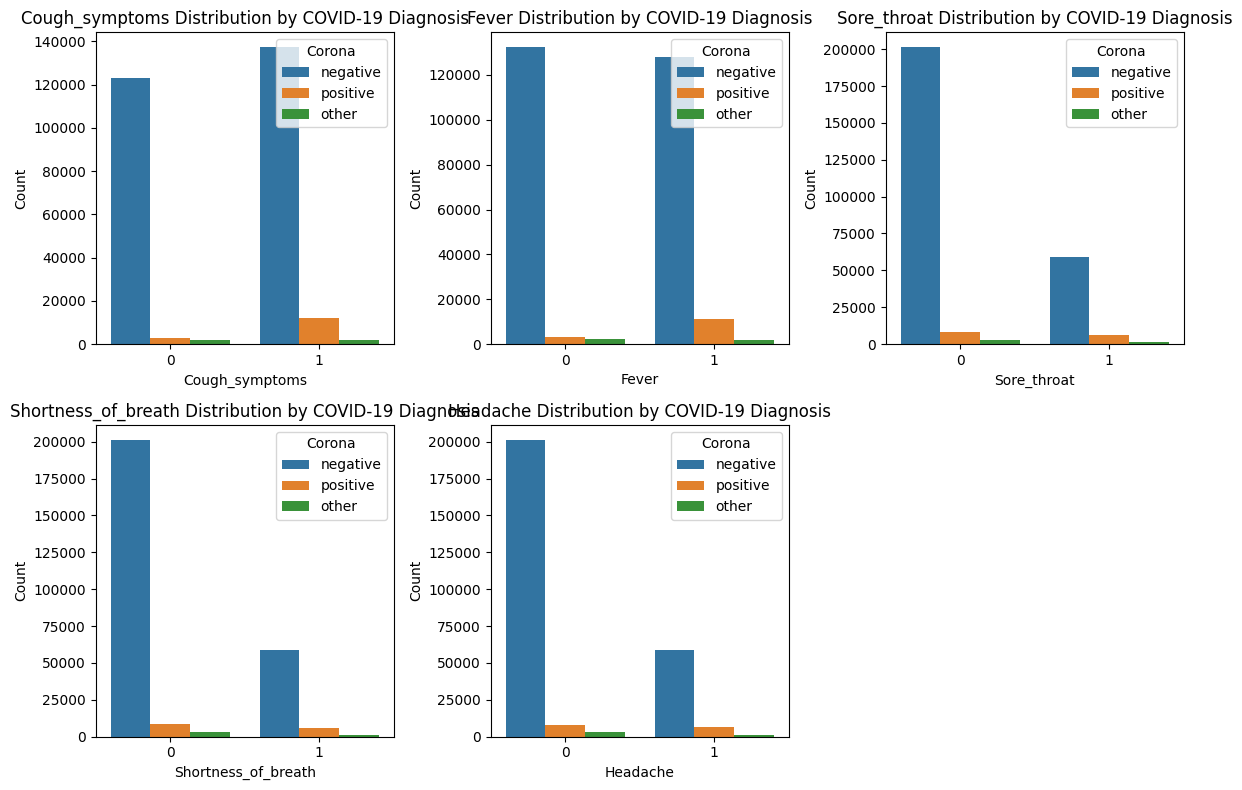

In [108]:
# Visualization 3: Symptoms Distribution
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

plt.figure(figsize=(12, 8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=symptom, data=data, hue='Corona')
    plt.title(f'{symptom} Distribution by COVID-19 Diagnosis')
    plt.xlabel(symptom)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

shows that distribution of individual symptoms (Cough, Fever, Sore throat, Shortness of breath, Headache) by COVID-19 diagnosis using count plots.
The visualization displays the distribution of common symptoms (cough, fever, sore throat, shortness of breath, and headache) among individuals who tested positive and negative for COVID-19. This set of subplots provides insights into how these symptoms relate to the diagnosis. Here's a report based on this visualization:



<ipython-input-109-cb4b4e869bab>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


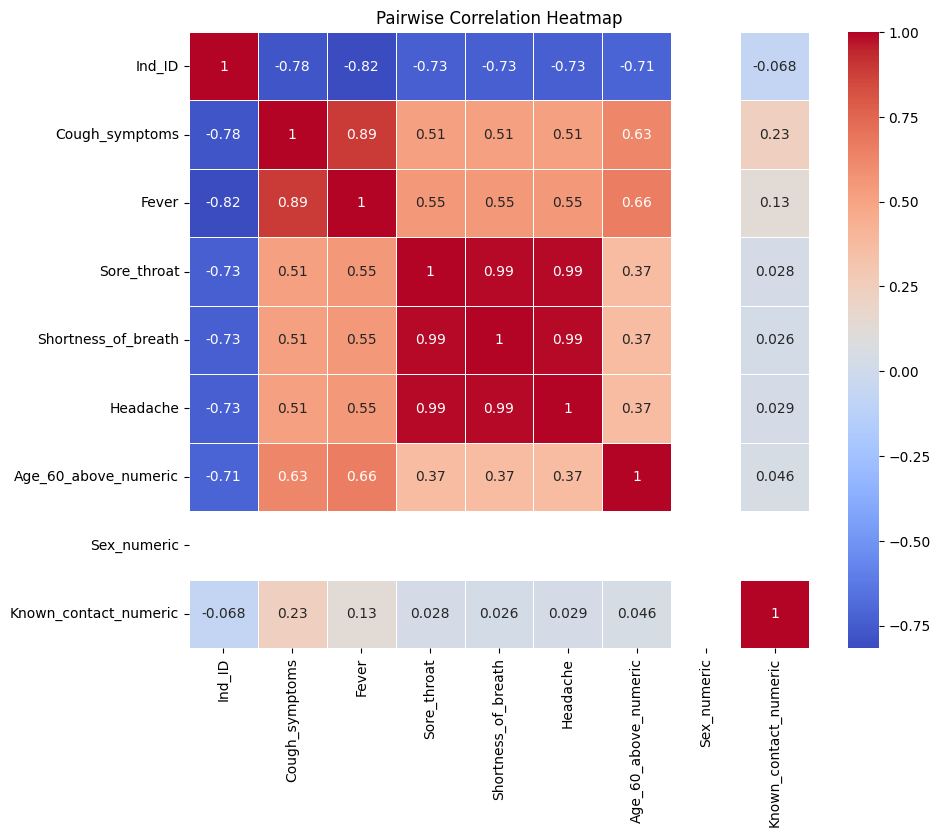

In [109]:
# Visualization 4: Pairwise Correlation Heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()

 pairwise correlation heatmap is generated in Visualization 4 to visualize the correlations between different features in the dataset.
 the heatmap uses a color scale to represent the strength and direction of correlations between features. Positive correlations are shown in warmer colors (e.g., red), while negative correlations are shown in cooler colors (e.g., blue).
Annotations within each cell of the heatmap indicate the numerical value of the correlation coefficient, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation).
Features on both the x-axis and y-axis represent different attributes in the dataset.



Machine Learning Approach:
Model Selection: Experiment with multiple machine learning models, including Logistic Regression, Random Forest, Support Vector Machine, and Neural Network.
Hyperparameter Tuning: Optimize model hyperparameters to enhance prediction accuracy.

Model Evaluation: Use appropriate evaluation metrics like accuracy, precision, recall, and F1-score to compare model performance.

Cost Function: Calculate relevant cost functions to justify the superiority of our selected model.
Model Interpretability: Utilize model interpretability techniques to understand the importance of features in COVID-19 prediction.



# Final Model Deployment: Deploy the best-performing model for COVID-19 prediction based on symptoms and other factors.

In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier




In [111]:
# Assuming 'X_train', 'X_val', 'y_train', 'y_val', 'X_test', 'y_test' are already defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [112]:
# Initialize models
logistic_reg = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)



****

**Logistic Regression Model For Train & Validation**

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Assuming 'X_train', 'X_val', 'y_train', 'y_val' are your training and validation sets

# Create a LogisticRegression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
classification_report=classification_report(y_val, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:",classification_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.9352698583467814
Classification Report:               precision    recall  f1-score   support

    negative       0.94      1.00      0.97     41641
       other       0.00      0.00      0.00       597
    positive       0.96      0.04      0.07      2378

    accuracy                           0.94     44616
   macro avg       0.63      0.35      0.35     44616
weighted avg       0.92      0.94      0.91     44616



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Assuming 'X_train', 'X_val', 'y_train', 'y_val' are your training and validation sets

# Create a LogisticRegression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_train)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_pred)
classification_report=classification_report(y_train, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:",classification_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.9351010299111295
Classification Report:               precision    recall  f1-score   support

    negative       0.94      1.00      0.97    166545
       other       0.00      0.00      0.00      2504
    positive       0.95      0.04      0.07      9413

    accuracy                           0.94    178462
   macro avg       0.63      0.35      0.35    178462
weighted avg       0.92      0.94      0.91    178462



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression Model For Test**

In [115]:

# Make predictions on the test data
y_pred = model.predict(X)

# Print the predicted labels
print("Predicted labels:", y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Predicted labels: ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
Accuracy: 0.9350255336240533


In [116]:
from sklearn.model_selection import cross_val_score

# Create an AdaBoostClassifier model
model = LogisticRegression(solver='liblinear', random_state=42)

# Perform cross-validation
num_folds = 5
scores = cross_val_score(model, X, y, cv=num_folds, scoring='accuracy')

# Print the accuracy for each fold
for fold_num, score in enumerate(scores, start=1):
    print(f"Fold {fold_num} Accuracy: {score:.2f}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy:.2f}")

Fold 1 Accuracy: 0.87
Fold 2 Accuracy: 0.93
Fold 3 Accuracy: 0.94
Fold 4 Accuracy: 0.94
Fold 5 Accuracy: 0.93
Mean Accuracy: 0.92


**Random Forest For Train & Validation**

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)

print("Random Forest Accuracy Score : ",accuracy)

Random Forest Accuracy Score :  0.9521920387305003


**Random Forest For Test**

In [118]:
y_pred = model.predict(X)

# Print the predicted labels
print("Predicted labels:", y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("Random Forest Accuracy:", accuracy)

Predicted labels: ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
Random Forest Accuracy: 0.950629016525132


**KNN Clustering Algorithm**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=3
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_val)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.9509144701452393


In [120]:
y_pred = model.predict(X)

# Print the predicted labels
print("Predicted labels:", y_pred)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print("KNN Accuracy:", accuracy)

Predicted labels: ['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']
KNN Accuracy: 0.950629016525132


**Gradient Boosting**

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier model with specified hyperparameters
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred = model.predict(X_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Gradient Boosting Accuracy:", val_accuracy)

Gradient Boosting Accuracy: 0.9522368656984042


In [122]:


y_val_pred = model.predict(X)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y, y_val_pred)
print("Gradient Boosting Accuracy:", val_accuracy)

Gradient Boosting Accuracy: 0.9506146717925178


In [123]:
# Model training and evaluation
models = [logistic_reg, random_forest,knn_model,gradient_model]
model_names = ['Logistic Regression', 'Random Forest','KneighborsClassifier','GradiebtBoosting']
best_model = None
best_accuracy = 0

Logistic Regression Validation Accuracy: 0.9353
Random Forest Validation Accuracy: 0.9522
KneighborsClassifier Validation Accuracy: 0.9351
GradiebtBoosting Validation Accuracy: 0.9522
The best model is: GradientBoostingClassifier(random_state=42) with validation accuracy: 0.9522
The best model (GradientBoostingClassifier(random_state=42)) achieved a test accuracy of 0.9491
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.96      0.99      0.97     52041
       other       0.00      0.00      0.00       791
    positive       0.69      0.54      0.60      2938

    accuracy                           0.95     55770
   macro avg       0.55      0.51      0.53     55770
weighted avg       0.93      0.95      0.94     55770

Confusion Matrix:


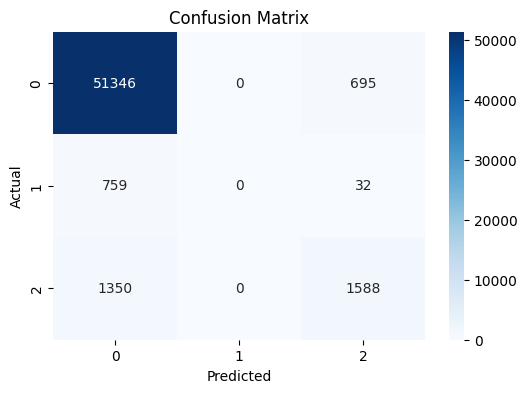

In [124]:

# Iterate through models and find the best one
for model, model_name in zip(models, model_names):
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred_val)

    print(f"{model_name} Validation Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

print(f"The best model is: {best_model} with validation accuracy: {best_accuracy:.4f}")

# Now, evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"The best model ({best_model}) achieved a test accuracy of {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:")
confusion_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


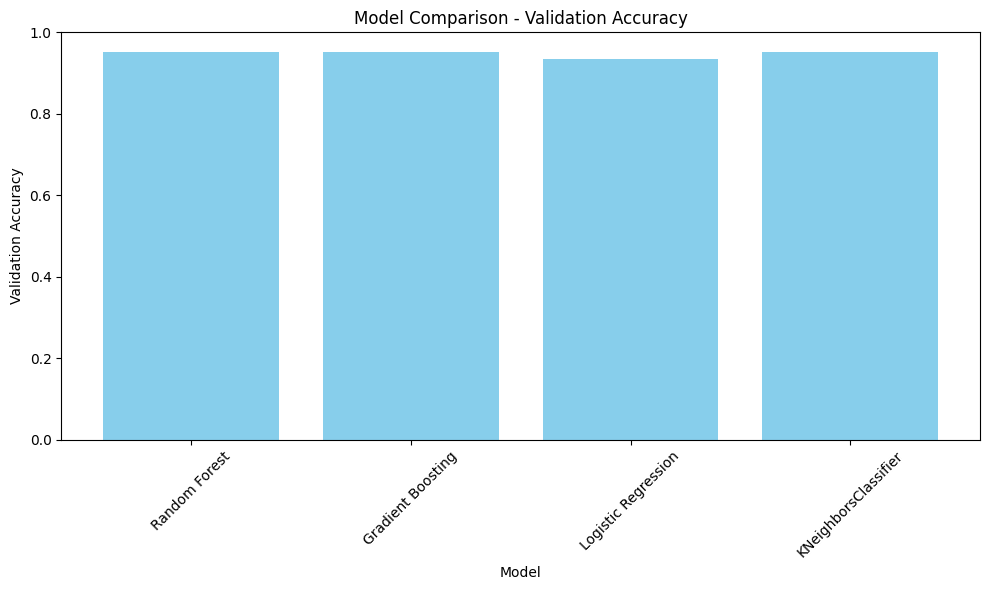

The best model is: Gradient Boosting with validation accuracy: 0.9522


In [125]:


models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
]

model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'KNeighborsClassifier']

# Create empty lists to store validation accuracies
validation_accuracies = []

# Assuming you have valid data for training and validation (X_train_scaled, X_val_scaled, y_train, y_val)

# Iterate over models and calculate validation accuracy
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_val = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred_val)
    validation_accuracies.append(accuracy)

# Create a bar chart to visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(model_names, validation_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison - Validation Accuracy')
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1 for accuracy scores
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Find the best model based on validation accuracy
best_model_idx = np.argmax(validation_accuracies)
best_model_name = model_names[best_model_idx]
best_accuracy = validation_accuracies[best_model_idx]

print(f"The best model is: {best_model_name} with validation accuracy: {best_accuracy:.4f}")



<ipython-input-128-000027a27024>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x=model_names, y=validation_accuracies, ci='sd')


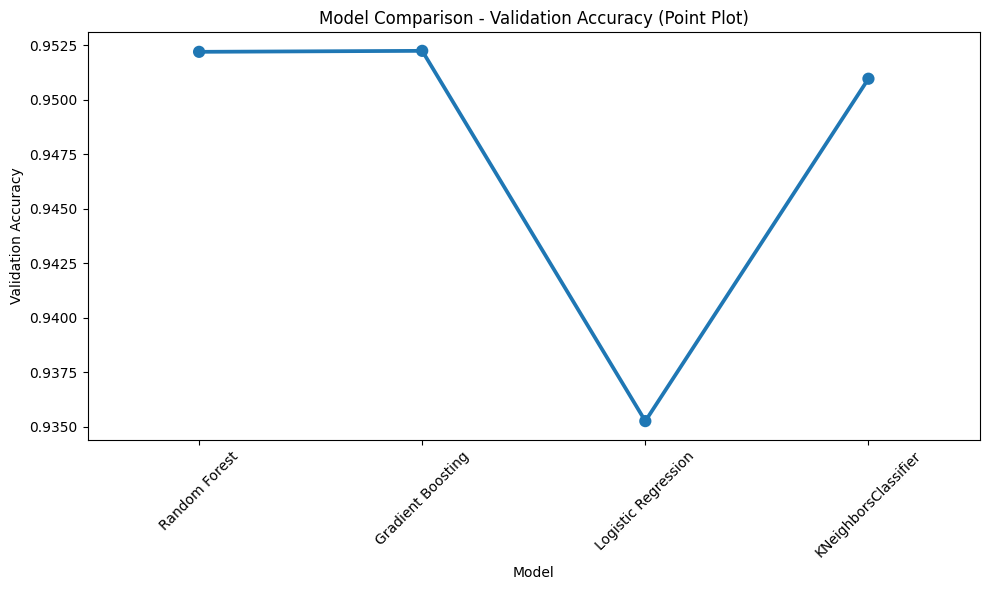

In [128]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=model_names, y=validation_accuracies, ci='sd')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.title('Model Comparison - Validation Accuracy (Point Plot)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Hyperparameter Tuning**

In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for randomized search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object with cross-validation and parallel processing
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=1, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the randomized search to the training data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(random_search.best_params_)

# Get the best model from the randomized search
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the validation and test sets
y_pred_val = best_rf_model.predict(X_val_scaled)
validation_accuracy = accuracy_score(y_val, y_pred_val)

y_pred_test = best_rf_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the validation and test accuracies
print(f"Validation Accuracy with Best Model: {validation_accuracy:.4f}")
print(f"Test Accuracy with Best Model: {test_accuracy:.4f}")


Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}
Validation Accuracy with Best Model: 0.9522
Test Accuracy with Best Model: 0.9492
